###### Explore AI Academy: Final Python Project

<div style="font-size: 35px">
    <font color='Blue'> <b>CO2 Regression Analysis</b></font> 

## 📑 Table of Contents

**📘 1. Project Overview**  
**⚙️ 2. Importing Packages**  
**📥 3. Loading Data and Combining Data**  
**🧹 4. Data Cleaning**  
**📊 5. Exploratory Data Analysis (EDA)**   
**🤖 6. Modeling**  
**🏁 7. Conclusion**  

## 📘 1. Project Overview

### 📖 1.1 Introduction  
The team of environmental consultants and data scientists (us as collabarators) were tasked by a coalition of agricultural stakeholders to analyse and predict the effect of CO2 emissions on climate change from the agri-food sector. The stakeholders include policymakers, agricultural businesses, and environmental organisations. The project aims to understand the impact of agricultural activities on climate change and develop strategies for sustainable practices. Utilising a comprehensive dataset compiled from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC), various emission sources were explored, regression analysis to predict temperature variations performed, and actionable insights for the stakeholders are offered.

This project provides a thorough understanding of the impact of agricultural activities on CO2 emissions and climate change. The intention is for the findings and recommendations to contribute to the ongoing efforts to promote sustainability within the agri-food sector, providing valuable insights for the stakeholders involved in this initiative.

### 📊 1.2 Data Set
Dataset Features:

- Savanna fires: Emissions from fires in savanna ecosystems.
- Forest fires: Emissions from fires in forested areas.
- Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
- Rice Cultivation: Emissions from methane released during rice cultivation.
- Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
- Pesticides Manufacturing: Emissions from the production of pesticides.
- Food Transport: Emissions from transporting food products.
- Forestland: Land covered by forests.
- Net Forest conversion: Change in forest area due to deforestation and afforestation.
- Food Household Consumption: Emissions from food consumption at the household level.
- Food Retail: Emissions from the operation of retail establishments selling food.
- On-farm Electricity Use: Electricity consumption on farms.
- Food Packaging: Emissions from the production and disposal of food packaging materials.
- Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
- Food Processing: Emissions from processing food products.
- Fertilizers Manufacturing: Emissions from the production of fertilizers.
- IPPU: Emissions from industrial processes and product use.
- Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
- Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
- Manure Management: Emissions from managing and treating animal manure.
- Fires in organic soils: Emissions from fires in organic soils.
- Fires in humid tropical forests: Emissions from fires in humid tropical forests.
- On-farm energy use: Energy consumption on farms.
- Rural population: Number of people living in rural areas.
- Urban population: Number of people living in urban areas.
- Total Population - Male: Total number of male individuals in the population.
- Total Population - Female: Total number of female individuals in the population.
- total_emission: Total greenhouse gas emissions from various sources.
- Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,
- CO2 is recorded in kilotonnes (kt): 1 kt represents 1000 kg of CO2.

The feature "Average Temperature C°", represents the average yearly temperature increase. For example, if it is 0.12, it means that the temperature in that specific location increased by 0.12 degrees Celsius.

# ⚙️ 2. Importing Packages  

In [153]:
import os, warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Paths
RAW_LOCAL = 'agri_regression/data/co2_emissions_from_agri.csv'
CLEAN_PATH = 'agri_regression/data/co2_clean.parquet'
os.makedirs(os.path.dirname(CLEAN_PATH), exist_ok=True)


## 📥 3. Loading Data and Combining Data
- Load the agri-emissions dataset (local if present; otherwise fetch from GitHub raw)
- Sanity checks, cleaning, save a clean snapshot

In [154]:
if os.path.exists(RAW_LOCAL):
    df = pd.read_csv(RAW_LOCAL)
else:
    url = 'https://raw.githubusercontent.com/Edotsey/2401PTDS_Regression_Project/main/co2_emissions_from_agri.csv'
    df = pd.read_csv(url)

print('Shape:', df.shape)
display(df.head(3))
print(df.columns.tolist())
print(df.dtypes.value_counts())


Shape: (6965, 31)


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583


['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use', 'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female', 'total_emission', 'Average Temperature °C']
float64    29
object      1
int64       1
Name: count, dtype: int64


#### Quick audit

In [155]:
print('Missing (top 10):')
print(df.isna().sum().sort_values(ascending=False).head(10))
print('Duplicates:', df.duplicated().sum())


Missing (top 10):
Crop Residues                      1389
On-farm energy use                  956
Manure Management                   928
Manure applied to Soils             928
IPPU                                743
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
dtype: int64
Duplicates: 0


## 🧹 4. Data Cleaning

#### Tidy column names, coerce numeric, and clean

In [156]:
# Strip whitespace in column names
df.columns = [c.strip() for c in df.columns]

# Keep Area as categorical; Year and others become numeric
categorical_cols = ['Area']
for col in df.columns:
    if col not in categorical_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

TARGET = 'Average Temperature °C'
# Drop rows with missing target
df = df[~df[TARGET].isna()].copy()

# Drop rows with too many NaNs per row
row_na_ratio = df.isna().mean(axis=1)
df = df[row_na_ratio <= 0.30].copy()

# Median-impute remaining numeric NaNs
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print('After cleaning:', df.shape)


After cleaning: (6965, 31)


In [157]:
le = LabelEncoder()
df['Area_encoded'] = le.fit_transform(df['Area'])
df.drop(columns='Area', inplace=True)

df.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Area_encoded
0,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,...,0.0,0.0,141.0963,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,0
1,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,...,0.0,0.0,141.0963,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,0
2,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,...,0.0,0.0,141.0963,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,0
3,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,...,0.0,0.0,141.0963,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,0
4,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,...,0.0,0.0,141.0963,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,0


## Save clean snapshot

In [158]:
df.to_parquet(CLEAN_PATH, index=False)
print('Saved clean data →', CLEAN_PATH)


Saved clean data → agri_regression/data/co2_clean.parquet


## 📊 5. Exploratory Data Analysis (EDA)
- Target distribution
- Correlation heatmap
- Scatter plots for top correlated features

#### Target distribution

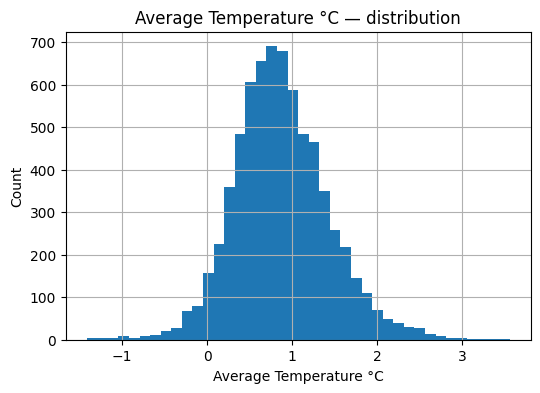

In [159]:
CLEAN_PATH = 'agri_regression/data/co2_clean.parquet'
df = pd.read_parquet(CLEAN_PATH)
TARGET = 'Average Temperature °C'

plt.figure(figsize=(6,4))
df[TARGET].hist(bins=40)
plt.title('Average Temperature °C — distribution')
plt.xlabel(TARGET)
plt.ylabel('Count')
plt.show()

#### Correlation heatmap (numeric features) - by coutry and year

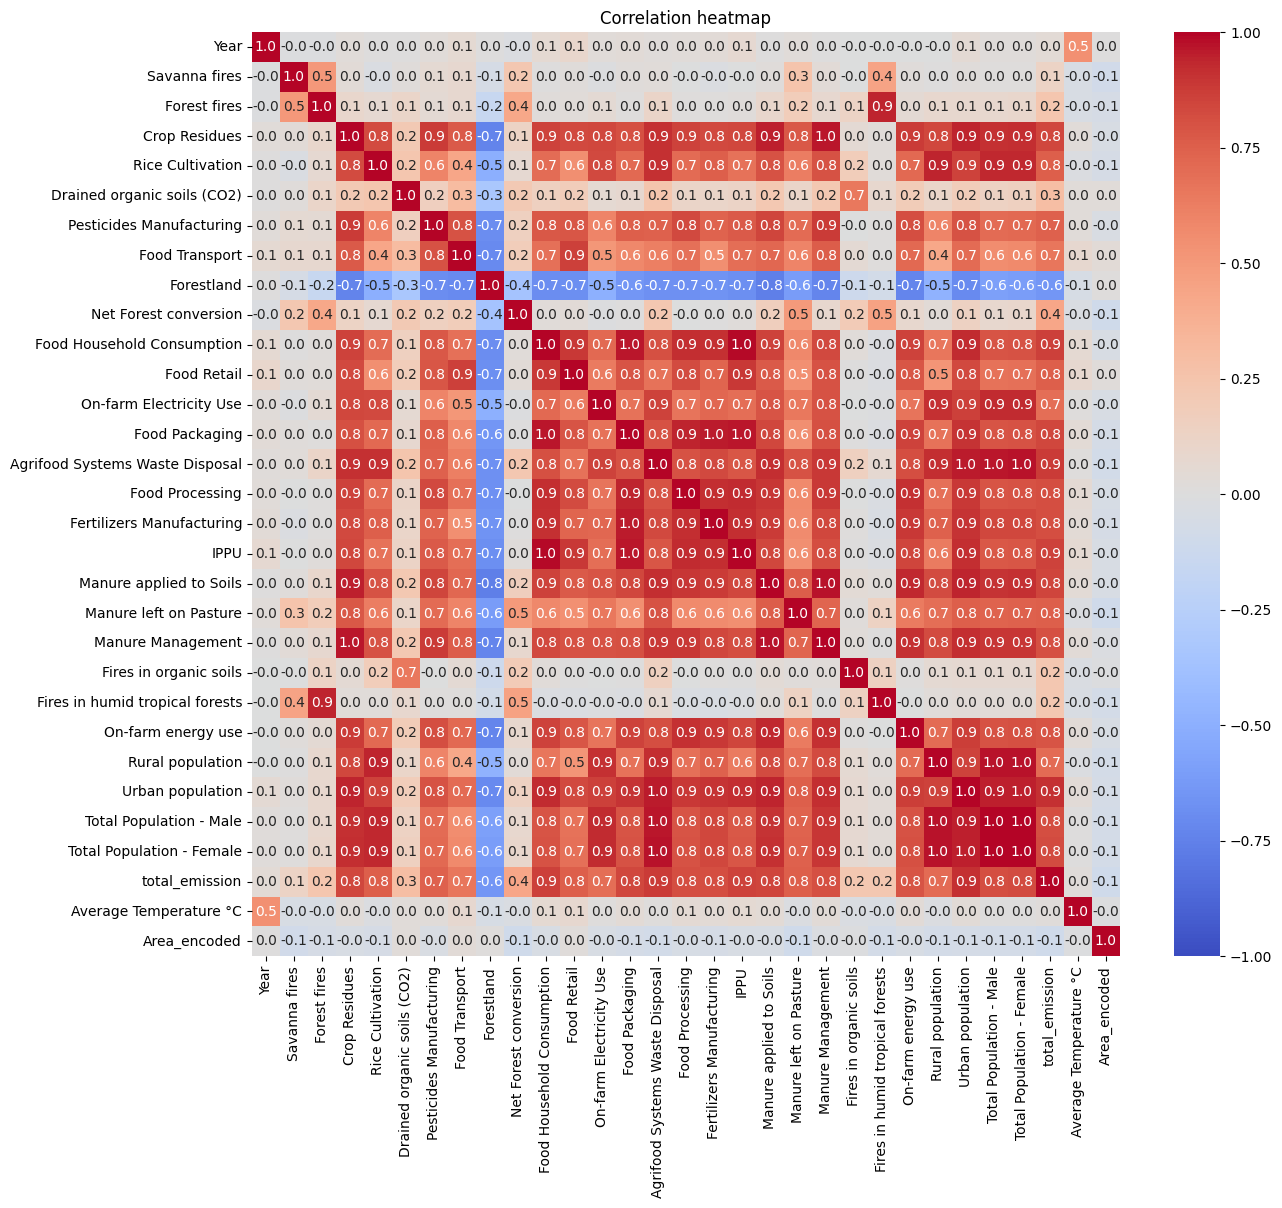

In [160]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot = True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".1f")
plt.title('Correlation heatmap')
plt.show()

#### Top correlations with target & scatter plots

Top correlations to target:
 Year                          0.545932
Food Transport                0.075724
Food Retail                   0.073404
IPPU                          0.062307
Food Household Consumption    0.055542
Food Processing               0.053083
Manure applied to Soils       0.042268
Fertilizers Manufacturing     0.041462
Food Packaging                0.040767
On-farm energy use            0.039016
Urban population              0.036263
Manure Management             0.032698
Name: Average Temperature °C, dtype: float64


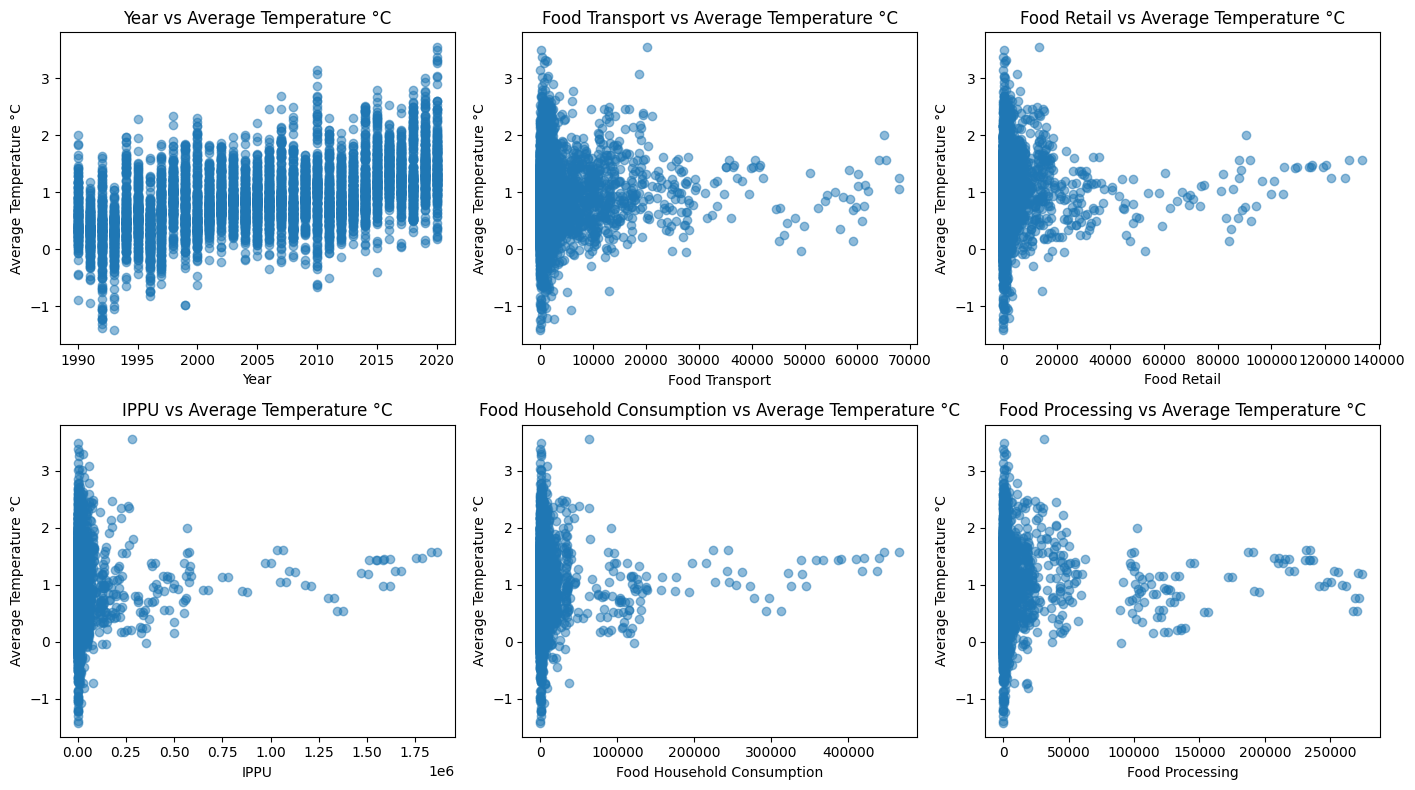

In [161]:
corr_to_y = corr[TARGET].drop(labels=[TARGET]).sort_values(ascending=False)
print('Top correlations to target:\n', corr_to_y.head(12))

top_feats = corr_to_y.head(6).index.tolist()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
for ax, col in zip(axes.flatten(), top_feats):
    ax.scatter(df[col], df[TARGET], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel(TARGET)
    ax.set_title(f'{col} vs {TARGET}')
plt.tight_layout()
plt.show()

#### Check for normality for all features in dataset

In [162]:
# Only check numeric features
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

normality_results = []
for col in numeric_features:
    stat, p = normaltest(df[col].dropna())
    normality_results.append({
        'Feature': col,
        'p-value': p,
        'Normal? (p > 0.05)': p > 0.05
    })

normality_df = pd.DataFrame(normality_results).sort_values('p-value')
display(normality_df)

,Feature,p-value,Normal? (p > 0.05)
0,Year,0.000000e+00,False
1,Savanna fires,0.000000e+00,False
2,Forest fires,0.000000e+00,False
3,Crop Residues,0.000000e+00,False
4,Rice Cultivation,0.000000e+00,False
5,Drained organic soils (CO2),0.000000e+00,False
6,Pesticides Manufacturing,0.000000e+00,False
7,Food Transport,0.000000e+00,False
8,Forestland,0.000000e+00,False
9,Net Forest conversion,0.000000e+00,False


#### Check for multicollinearity

In [165]:
# Step 1: Drop accidental index column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

features = df.select_dtypes(include='number').drop(columns=['Average Temperature °C'])

# Add constant term for intercept
X_vif = add_constant(features)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by VIF
vif_data.sort_values("VIF", ascending=False)


,Feature,VIF
29,total_emission,401482.003219
18,IPPU,85994.768779
10,Net Forest conversion,73478.394907
0,const,54136.398374
9,Forestland,48083.041802
28,Total Population - Female,10368.778042
27,Total Population - Male,9448.364630
11,Food Household Consumption,4860.242587
22,Fires in organic soils,3955.651263
15,Agrifood Systems Waste Disposal,3866.410370


Several features have extremely high VIF (VIF > 10 indicates high multicollinearity i.e. redundant). Drop total_emission, IPPU, Net Forest Conversion - although several regression models should take into account other multicollineraity 

## 🤖 6. Modeling
- Train/test split
- Baseline mean model
- Linear Regression
- Ridge & Lasso with CV
- Diagnostics and model comparison

#### Linear regression, Ridge & Lasso with CV

,model,R2,MAE,RMSE
1,LinearRegression,0.317799,0.348271,0.461951
3,Lasso(alpha=0.003162),0.316994,0.348991,0.462224
2,Ridge(alpha=316.2),0.315191,0.349338,0.462834
0,BaselineMean,-0.001757,0.433776,0.559785


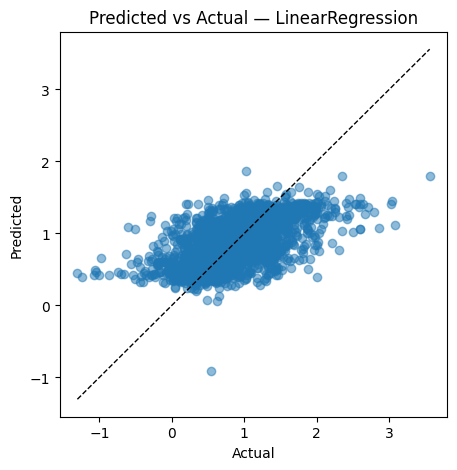

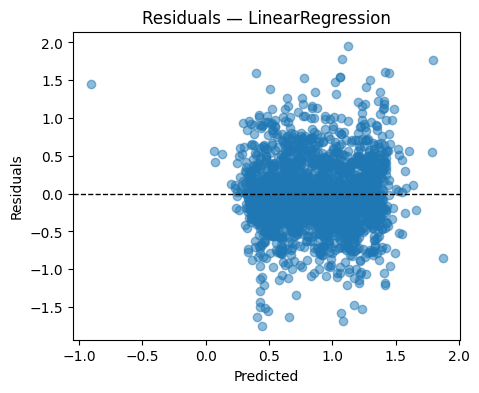

Saved → agri_regression/outputs/model_comparison.csv


In [168]:
X = df.drop(columns=[TARGET,'total_emission', 'IPPU', 'Net Forest conversion'])
y = df[TARGET]
num_features = X.select_dtypes(include=np.number).columns.tolist()

preprocess = ColumnTransformer([
    ('scale', StandardScaler(), num_features)
])

# This is the function where the correction was made.
def evaluate(name, y_true, y_pred):
    """
    Calculates and returns evaluation metrics for a model.
    """
    return {
        'model': name,
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        # FIX: Calculate RMSE by taking the square root of MSE.
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
    }

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class MeanRegressor:
    """
    A simple regressor that predicts the mean of the training target.
    """
    def fit(self, X, y):
        self.mean_ = float(np.mean(y)); return self
    def predict(self, X):
        return np.full((len(X),), self.mean_, dtype=float)

# --- Baseline Model ---
baseline = MeanRegressor().fit(X_train, y_train)
base_pred = baseline.predict(X_test)
results = [evaluate('BaselineMean', y_test, base_pred)]

# --- Linear Regression ---
lin = Pipeline([
    ('prep', preprocess),
    ('model', LinearRegression())
])
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
results.append(evaluate('LinearRegression', y_test, lin_pred))

# --- Ridge Regression with Cross-Validation ---
ridge = Pipeline([
    ('prep', preprocess),
    ('model', Ridge())
])
ridge_params = {'model__alpha': np.logspace(-3, 3, 13)}
ridge_cv = GridSearchCV(ridge, ridge_params, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=42))
ridge_cv.fit(X_train, y_train)
ridge_pred = ridge_cv.predict(X_test)
results.append(evaluate(f"Ridge(alpha={ridge_cv.best_params_['model__alpha']:.4g})", y_test, ridge_pred))

# --- Lasso Regression with Cross-Validation ---
lasso = Pipeline([
    ('prep', preprocess),
    ('model', Lasso(max_iter=10000))
])
lasso_params = {'model__alpha': np.logspace(-3, 1, 9)}
lasso_cv = GridSearchCV(lasso, lasso_params, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=42))
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)
results.append(evaluate(f"Lasso(alpha={lasso_cv.best_params_['model__alpha']:.4g})", y_test, lasso_pred))

# --- Display and Visualize Results ---
res_df = pd.DataFrame(results).sort_values('R2', ascending=False)
display(res_df)

name_to_pred = {
    'BaselineMean': base_pred,
    'LinearRegression': lin_pred,
}
best_name = res_df.iloc[0]['model']
best_pred = (
    ridge_pred if 'Ridge' in best_name else (
        lasso_pred if 'Lasso' in best_name else name_to_pred.get(best_name, lin_pred)
    )
)

# Predicted vs Actual Plot
plt.figure(figsize=(5,5))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual — {best_name}')
plt.show()

# Residuals Plot
residuals = y_test - best_pred
plt.figure(figsize=(5,4))
plt.scatter(best_pred, residuals, alpha=0.5)
plt.axhline(0, color='k', linestyle='--', lw=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title(f'Residuals — {best_name}')
plt.show()

# --- Save Results ---
import os
os.makedirs('agri_regression/outputs', exist_ok=True)
res_df.to_csv('agri_regression/outputs/model_comparison.csv', index=False)
print('Saved → agri_regression/outputs/model_comparison.csv')

#### Random forest

In [169]:
X = df.drop(columns=[TARGET, 'total_emission', 'IPPU', 'Net Forest conversion'])
y = df[TARGET]
num_features = X.select_dtypes(include=np.number).columns.tolist()

# --- 2. Split Data BEFORE any training ---
# FIX: Splitting the data first to prevent data leakage.
# The GridSearchCV should only see the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Create Preprocessing and Model Pipeline ---
preprocess = ColumnTransformer([
    ('num', StandardScaler(with_mean=False), num_features)
])

rf = RandomForestRegressor(random_state=42)
pipe = Pipeline([
    ('prep', preprocess),
    ('rf', rf)
])

# --- 4. Define Hyperparameter Grid and Run GridSearchCV ---
param_grid = {
    'rf__n_estimators': [200, 400],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Run GridSearchCV on the TRAINING data only
cv = GridSearchCV(pipe, param_grid, scoring='r2', cv=3, n_jobs=-1)
cv.fit(X_train, y_train)
print('Best params:', cv.best_params_)

# --- 5. Evaluate the Best Model on the Hold-out Test Set ---
# The cv.best_estimator_ is already fitted on the full training data
best_pipe = cv.best_estimator_
y_pred = best_pipe.predict(X_test)

print('--- Test Set Evaluation ---')
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
# FIX: Calculate RMSE using np.sqrt() to avoid TypeError
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# --- 6. Analyze Feature Importances ---
rf_model = best_pipe.named_steps['rf']
importances = pd.Series(rf_model.feature_importances_, index=num_features).sort_values(ascending=False)
print('\nTop 20 importances:\n', importances.head(20))

# --- 7. Save Results ---
os.makedirs('agri_regression/outputs', exist_ok=True)
importances.to_csv('agri_regression/outputs/rf_feature_importances.csv')
print('\nSaved → agri_regression/outputs/rf_feature_importances.csv')


Best params: {'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 400}
--- Test Set Evaluation ---
R2: 0.6020832595551806
MAE: 0.25444158797579336
RMSE: 0.35280630634436644

Top 20 importances:
 Year                               0.401510
Manure left on Pasture             0.044591
Manure applied to Soils            0.036260
Forestland                         0.033651
Fires in humid tropical forests    0.031766
Food Transport                     0.030153
Savanna fires                      0.028159
On-farm Electricity Use            0.027508
Food Retail                        0.026587
On-farm energy use                 0.025927
Fertilizers Manufacturing          0.025069
Drained organic soils (CO2)        0.024971
Rural population                   0.024834
Rice Cultivation                   0.024662
Food Packaging                     0.023184
Food Processing                    0.021760
Food Household Consumption         0.021571
Crop Residu

## 🏁 Conclusion: Best Regression Model

Based on the evaluation metrics:

Based on the model evaluations (`R²`, `MSE`, `RMSE`, and `MAE`):

- **Best Model**: **Random Forest Regressor** as it has the highest `R²` and lowest `RMSE`, due to its ability to capture non-linear relationships.
- **Linear Regression** provides a good baseline with interpretable coefficients.
- **Ridge and Lasso** offer regularization and may perform well with collinear features or when dimensionality reduction is needed.
- **Random Forest** tends to outperform linear models when relationships between features and the target are complex or non-linear.

Based on random forest, increases in year is the the primary predictor of increases in average temperature.   

### ✅ Summary of Models:
| Model             | Strengths |
|------------------|-----------|
| Linear Regression | Simple, interpretable |
| Ridge             | Handles multicollinearity well |
| Lasso             | Performs feature selection |
| Random Forest     | Captures non-linear interactions, robust to outliers, low bias |

## Next steps

- Aggregate by year to see if there are global trends i.e. removing effect of country specific affects as random forest rgression shows that area (i.e. country) is a poor predictor.